## Introduction

This a notebook that uses a custom simple neural network. The objective is to test and fine tune it on the MNIST dataset. The neural network is implemented in the `neural_network.py` file. The notebook will use the `neural_network.py` file to train and test the neural network on the MNIST dataset.

### Install the required packages

In [44]:
#!pip install keras
#!pip install tensorflow
#!pip install scikit-learn
#!pip install tensorflow
#!pip install matplotlib
#!pip install pandas
#!pip install numpy
#!pip install seaborn
#!pip install scikit-learn

In [45]:
import importlib
import CustomNeuralNetwork 
importlib.reload(CustomNeuralNetwork)
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Analizing the data

The MNIST dataset is a dataset of 28x28 grayscale images of handwritten digits. The dataset has 60,000 training images and 10,000 test images. The images are labeled with the corresponding digit. This is already a processed dataset, so we don't need to make much preprocessing.


In [46]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()


In [47]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Then we should plot the first 10 images from the training set and display the class name below each image. This will verify that the data is in the correct format and we're ready to build and train the network.

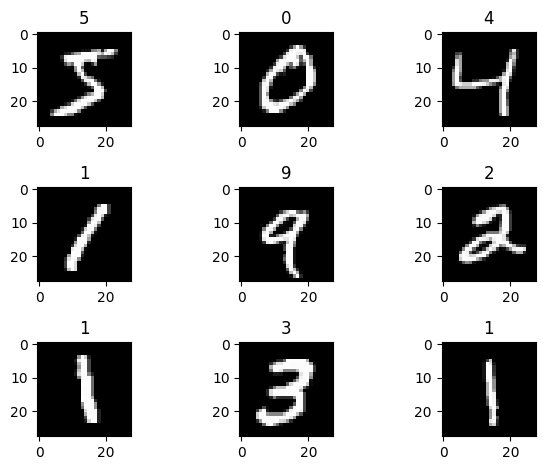

In [48]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.title(train_y[i])
plt.tight_layout()
plt.show()


Also, making sure of the even distribution of the classes in the dataset is important. We can do this by plotting the number of samples for each class.

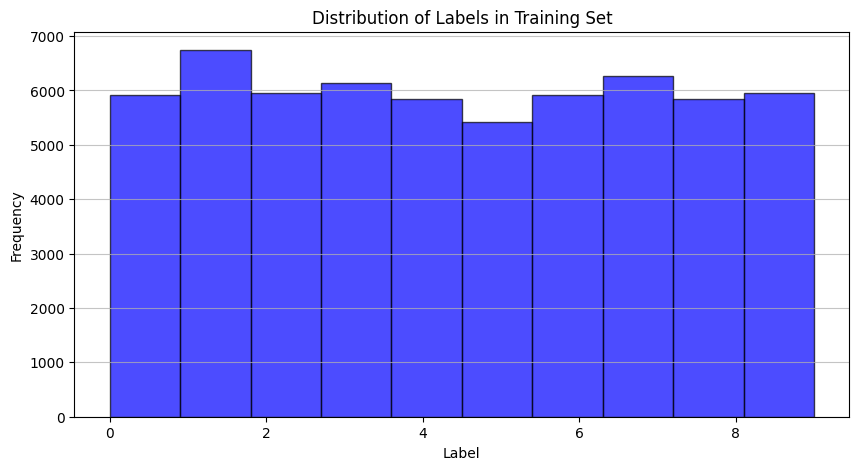

In [49]:
# Plot the distribution of labels in the training set
plt.figure(figsize=(10, 5))
plt.hist(train_y, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Processing the data

For the neural network to work, we need to flatten the images to a 1D array.

In [50]:
train_X_flatten = train_X.reshape(train_X.shape[0], -1).T
test_X_flatten = test_X.reshape(test_X.shape[0], -1).T  

train_y = train_y.reshape(-1, 1)  
test_y = test_y.reshape(-1, 1)   

Then we will plot the distribution of values of the pixels. This will help us decide if we need to normalize the data.

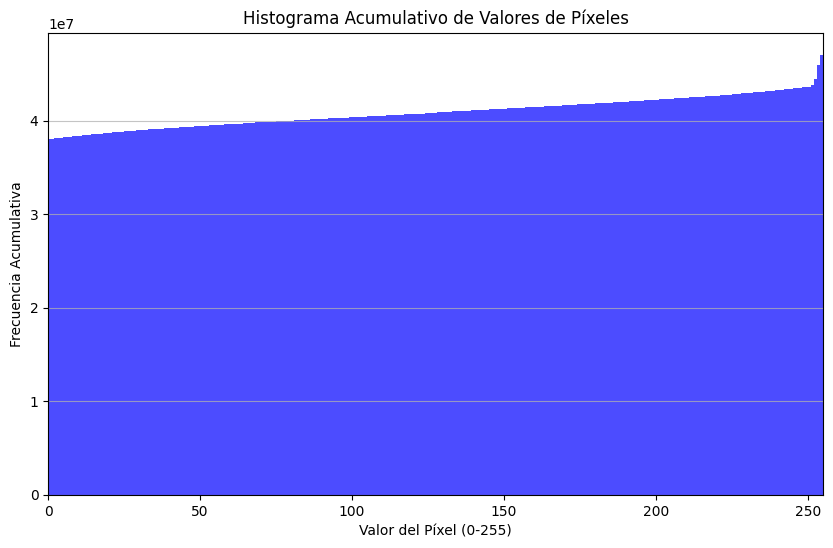

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(train_X_flatten.flatten(), bins=255, range=(0, 255), color='blue', alpha=0.7, cumulative=True)
plt.title('Histograma Acumulativo de Valores de Píxeles')
plt.xlabel('Valor del Píxel (0-255)')
plt.ylabel('Frecuencia Acumulativa')
plt.grid(axis='y', alpha=0.75)
plt.xlim([0, 255])
plt.show()

In [52]:
print("Training set - Max value:", train_X.max(), "Min value:", train_X.min())
print("Training set labels - Max value:", train_y.max(), "Min value:", train_y.min())
print("Test set - Max value:", test_X.max(), "Min value:", test_X.min())
print("Test set labels - Max value:", test_y.max(), "Min value:", test_y.min())

Training set - Max value: 255 Min value: 0
Training set labels - Max value: 9 Min value: 0
Test set - Max value: 255 Min value: 0
Test set labels - Max value: 9 Min value: 0


As we can see in the plot and the maximums and minimums of the pixels, the data is not normalized. We will normalize the data by dividing the pixel values by 255.

In [53]:
train_X_normalized = train_X_flatten / 255.0 

test_X_normalized = test_X_flatten / 255.0


In [54]:
train_X_normalized.shape, test_X_normalized.shape

((784, 60000), (784, 10000))

In [55]:
print("Training set - Max value:", train_X_normalized.max(), "Min value:", train_X_normalized.min())
print("Training set labels - Max value:", train_y.max(), "Min value:", train_y.min())
print("Test set - Max value:", test_X_normalized.max(), "Min value:", test_X_normalized.min())
print("Test set labels - Max value:", test_y.max(), "Min value:", test_y.min())

Training set - Max value: 1.0 Min value: 0.0
Training set labels - Max value: 9 Min value: 0
Test set - Max value: 1.0 Min value: 0.0
Test set labels - Max value: 9 Min value: 0


In [56]:
encoder = OneHotEncoder(sparse_output=False, categories='auto')
train_y_onehot = encoder.fit_transform(train_y)
train_y_onehot = train_y_onehot.T

test_y_onehot = encoder.transform(test_y).T

In [57]:
train_y_onehot.shape

(10, 60000)

In [58]:
test_y_onehot.shape

(10, 10000)

We can see the result on one hot encoding the y values.

## Building and training the model

We will build a first example with the following architecture:
- Input layer with 784 neurons
- Hidden layer with 128 neurons
- Output layer with 10 neurons

The first layers needs to have 784 neurons because the images are 28x28 pixels. The output layer needs to have 10 neurons because we have 10 classes.
Hidden layers can have any number of layers and neurons , but we will start with 1 layer of 128 neurons.

In [59]:
train_X_normalizedT = train_X_normalized.T 
train_y_onehotT = train_y_onehot.T

print("Nueva forma de train_X_normalizedT:", train_X_normalizedT.shape) 
print("Nueva forma de train_y_onehotT:", train_y_onehotT.shape)

Nueva forma de train_X_normalizedT: (60000, 784)
Nueva forma de train_y_onehotT: (60000, 10)


In [60]:
from CustomNeuralNetwork import CustomNeuralNetwork

layers_dims = [784, 128, 16, 16, 10] 

BasicNeuralNetwork = CustomNeuralNetwork(layer_dims=layers_dims, epochs=500, lr=0.01)

params, cost_history = BasicNeuralNetwork.train(train_X_normalized, train_y_onehot, layers_dims)


In [61]:
predictions = BasicNeuralNetwork.predict(test_X_normalized, params)
print("Exactitud del modelo:", accuracy_score(test_y, predictions))
print(classification_report(test_y, predictions, zero_division=0))

Exactitud del modelo: 0.8334
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       980
           1       0.93      0.94      0.93      1135
           2       0.83      0.80      0.81      1032
           3       0.80      0.86      0.83      1010
           4       0.80      0.86      0.83       982
           5       0.80      0.66      0.72       892
           6       0.83      0.91      0.87       958
           7       0.89      0.84      0.87      1028
           8       0.78      0.77      0.78       974
           9       0.77      0.75      0.76      1009

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



Guardaremos estos parametros para poder usar este modelo entrenado en mi API de Django

In [62]:
BasicNeuralNetwork.save_params("../API/Model/model.h5")

In [63]:
pretrained_params = CustomNeuralNetwork.load_params('../API/Model/model.h5')
nn_pretrained = CustomNeuralNetwork(pretrained_params=pretrained_params)

predictionsPre = nn_pretrained.predict(test_X_normalized)
print("Exactitud del modelo:", accuracy_score(test_y, predictionsPre))
print(classification_report(test_y, predictionsPre, zero_division=0))


TypeError: object of type 'NoneType' has no len()

In [103]:
print("longitud de cost_history:", len(cost_history))
for i in range(0, len(cost_history)):
    if i % 10 == 0:
        print(f"Costo en la iteración {i}: {cost_history[i]}")

longitud de cost_history: 500
Costo en la iteración 0: 2.4303294722014015
Costo en la iteración 10: 2.310494735312726
Costo en la iteración 20: 2.2643465652003374
Costo en la iteración 30: 2.227136091717053
Costo en la iteración 40: 2.189873301710855
Costo en la iteración 50: 2.151976748859588
Costo en la iteración 60: 2.1139862995702403
Costo en la iteración 70: 2.076384274480268
Costo en la iteración 80: 2.038712720729651
Costo en la iteración 90: 2.000515996508468
Costo en la iteración 100: 1.9612124970640983
Costo en la iteración 110: 1.9204656893510308
Costo en la iteración 120: 1.8781533627134115
Costo en la iteración 130: 1.8346167207878814
Costo en la iteración 140: 1.7899879958182578
Costo en la iteración 150: 1.744317385811152
Costo en la iteración 160: 1.6976509319335464
Costo en la iteración 170: 1.650035095824643
Costo en la iteración 180: 1.6016157175597328
Costo en la iteración 190: 1.55263253672729
Costo en la iteración 200: 1.5033008312513114
Costo en la iteración 210:

Text(0, 0.5, 'Cost')

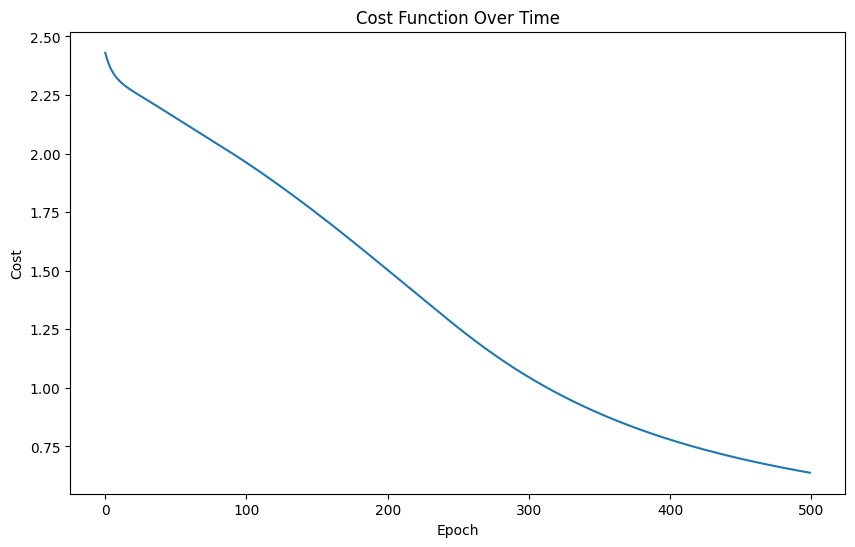

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title('Cost Function Over Time')
plt.xlabel('Epoch')
plt.ylabel('Cost')

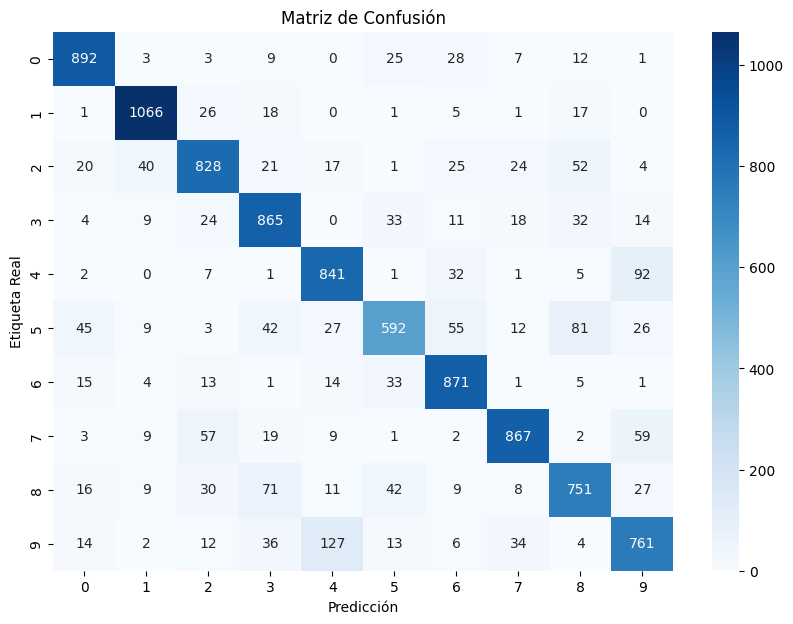

In [105]:
conf_matrix = confusion_matrix(test_y, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

## Tuning the model

After training the model, we can see that the accuracy is good (83%) but not great. We will try to improve it by tuning the model. We can try the following:
- *Learning rate*: The learning rate is a hyperparameter that controls how much we are adjusting the weights of our network with respect the loss gradient. We can try setting a **lower** learning rate, so the model learns more slowly but more accurately. We can also try setting a **higher** learning rate, so the model learns faster but it might not converge, or instead of converging it might oscillate around the minimum, but it has the advantage of skipping easier the local minimums.
- *Number of epochs*: The number of epochs is the number of times the model will see the whole dataset. We can try increasing the number of epochs to see if the model improves.

### First tune - Learning rate

We will try to tune the learning rate. We will try the following learning rates: 0.1, 0.01, 0.001, 0.0001.

In [106]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]

results = {}

for lr in learning_rates:
    print(f"Entrenando el modelo con learning rate: {lr}")

    BasicNeuralNetworkTunned = CustomNeuralNetwork(layer_dims=layers_dims, epochs=1000, lr=lr)
    paramsTunned, cost_history_tunned = BasicNeuralNetworkTunned.train(train_X_normalized, train_y_onehot, layers_dims)

    predictionsTunned = BasicNeuralNetworkTunned.predict(test_X_normalized, paramsTunned)

    accuracy = accuracy_score(test_y, predictionsTunned)
    results[lr] = {
        "accuracy": accuracy,
        "predictions": predictionsTunned,
        "classification_report": classification_report(test_y, predictionsTunned, zero_division=0)
    }

# Mostrar resultados



Entrenando el modelo con learning rate: 0.1


KeyboardInterrupt: 

In [179]:
for lr, result in results.items():
    print(f"\n--- Learning Rate: {lr} ---")
    print(f"Exactitud del modelo: {result['accuracy']}")
    print("Classification Report:\n", result['classification_report'])


--- Learning Rate: 0.1 ---
Exactitud del modelo: 0.9639
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.96      0.95      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000


--- Learning Rate: 0.01 ---
Exactitud del modelo: 0.8924
Classification Report:
               precision    recall  f1-score   support

           0       0.93

As we can see, 0.1 is the best learning rate, with an accuracy of 96.3%. Also the overall metrics (precision, recall, f1-score) are better with 0.1. That indicates, not only the classification is great, but also the model is not biased towards any class.

Even though 0.1 is the best learning rate, we can see that 0.01 is also a good learning rate, with an accuracy of 89.2%. This is interesting eventhough the learning rate is 10 times smaller, the accuracy is still good. This is because the model is learning slower, but it is still learning. As 0.1 is a pretty high learning rate, we will keep using it for the next steps but we wont discard 0.01, because maybe with more epochs it could reach a better accuracy.


### First tune - Epochs

We will try to tune the number of epochs. We will try the following number of epochs: 500, 1000, 1500, 2000.

In [1]:
learning_rates = [0.1, 0.01]
epochs_list = [500, 1000, 1500, 2000]

results = {}

for lr in learning_rates:
    for epochs in epochs_list:
        print(f"Entrenando el modelo con learning rate: {lr} y epochs: {epochs}")
        
        # Crear el modelo con los parámetros correspondientes de lr y epochs
        BasicNeuralNetworkTunned = CustomNeuralNetwork(layer_dims=layers_dims, epochs=epochs, lr=lr)
        
        # Entrenar el modelo
        paramsTunned, cost_history_tunned = BasicNeuralNetworkTunned.train(train_X_normalized, train_y_onehot, layers_dims)
        
        # Realizar predicciones en los datos de prueba
        predictionsTunned = BasicNeuralNetworkTunned.predict(test_X_normalized, paramsTunned)
        
        # Calcular la exactitud
        accuracy = accuracy_score(test_y, predictionsTunned)
        
        # Almacenar los resultados
        results[(lr, epochs)] = {
            "accuracy": accuracy,
            "predictions": predictionsTunned,
            "classification_report": classification_report(test_y, predictionsTunned, zero_division=0)
        }

Entrenando el modelo con learning rate: 0.1 y epochs: 500


NameError: name 'CustomNeuralNetwork' is not defined

In [ ]:
for key, value in results.items():
    lr, epochs = key
    print(f"--- Learning Rate: {lr}, Epochs: {epochs} ---")
    print(f"Exactitud del modelo: {value['accuracy']:.4f}")
    print(f"Classification Report:\n{value['classification_report']}")